# Das erste eigene Interferenz-Bild


Zuerst nimmt der Raspberry Pi ein Bild auf und extrahiert den Rotkanal (Farbe des Lasers). Das ist hier bereits geschehen, das Bild befindet sich in der Datei `holmos_raw.png`.
In folgendem Code-Abschnitt wird das Bild in die Variable `image` geladen und angezeigt.

<IPython.core.display.Javascript object>


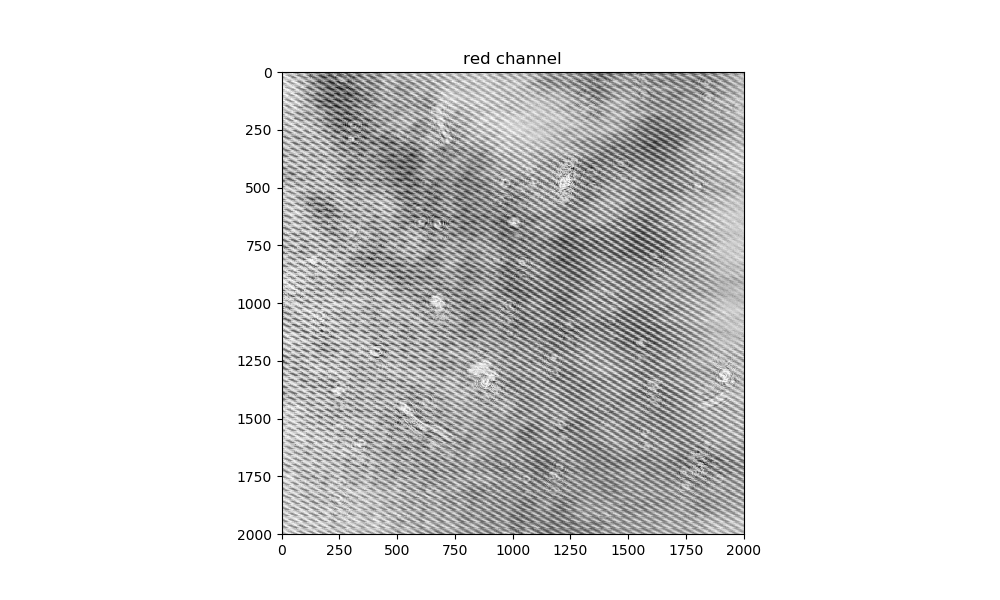

In [46]:
%matplotlib notebook

import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as patches

plt.rcParams['figure.figsize'] = (10, 6)

# Load image from file
image = (plt.imread('image_3.jpg') * 255).astype(np.uint8)[:2000,:2000,0]
#image = (plt.imread('holmos_raw.png')*255).astype(np.uint8)
width = image.shape[0]
height = image.shape[1]

plt.figure()
plt.title('red channel')
plt.imshow(image, cmap='gray')
plt.show()

<IPython.core.display.Javascript object>


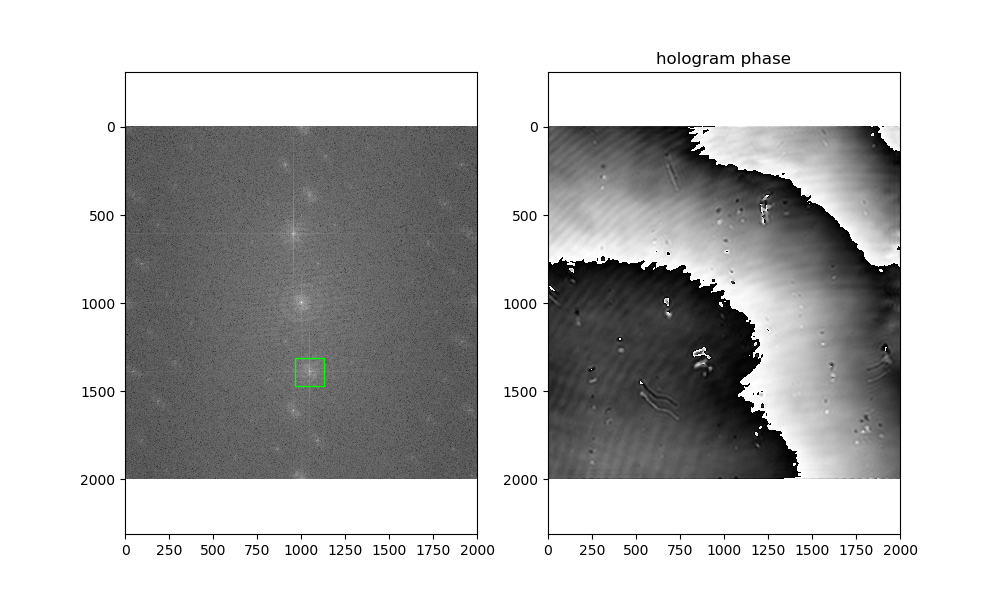

8

In [49]:
fourier_space = np.fft.fftshift(np.fft.fft2(image))
log_fourier = np.log(np.abs(fourier_space))

rect_center_x = width / 2
rect_center_y = height / 2
rect_radius = 80

fig = plt.figure()
ax1 = plt.subplot(121)
ax2 = plt.subplot(122, sharex=ax1, sharey=ax1)
plt.title('logarithmic fourier transform')
plt.imshow(log_fourier, cmap='gray')
ax.add_patch(patches.Rectangle((int(rect_center_x - rect_radius), 
                                int(rect_center_y -rect_radius)), 
                                int(rect_radius * 2), int(rect_radius * 2), fill=False, edgecolor="#00ff00"))
plt.sca(ax1)
ax1.clear()
plt.imshow(log_fourier, cmap='gray')
ax1.add_patch(patches.Rectangle((int(rect_center_x - rect_radius), 
                            int(rect_center_y -rect_radius)), 
                            int(rect_radius * 2), int(rect_radius * 2), fill=False, edgecolor="#00ff00"))
# Shift the fourier
fft_shifted = np.zeros_like(fourier_space)
x1 = width // 2 - (rect_radius*2) // 2
x2 = width // 2 + (rect_radius*2) // 2
y1 = height // 2 - (rect_radius*2) // 2
y2 = height // 2 + (rect_radius*2) // 2

fft_shifted[y1:y2, x1:x2] = fourier_space[int(rect_center_y - rect_radius):int(rect_center_y + rect_radius),
                                      int(rect_center_x - rect_radius):int(rect_center_x + rect_radius)]
hologram = np.fft.ifft2(np.fft.fftshift(fft_shifted))
holo_phase = np.angle(hologram)
holo_logamp = np.log(np.abs(hologram))

plt.sca(ax2)
plt.title("hologram phase")
plt.imshow(holo_phase, cmap='gray')

plt.show()

def onclick(event):
    if event.button != 1:
        return
    rect_center_x = event.xdata
    rect_center_y = event.ydata
    plt.sca(ax1)
    ax1.clear()
    plt.imshow(log_fourier, cmap='gray')
    ax1.add_patch(patches.Rectangle((int(rect_center_x - rect_radius), 
                                int(rect_center_y -rect_radius)), 
                                int(rect_radius * 2), int(rect_radius * 2), fill=False, edgecolor="#00ff00"))
    # Shift the fourier
    fft_shifted = np.zeros_like(fourier_space)
    x1 = width // 2 - (rect_radius*2) // 2
    x2 = width // 2 + (rect_radius*2) // 2
    y1 = height // 2 - (rect_radius*2) // 2
    y2 = height // 2 + (rect_radius*2) // 2
    
    fft_shifted[y1:y2, x1:x2] = fourier_space[int(rect_center_y - rect_radius):int(rect_center_y + rect_radius),
                                          int(rect_center_x - rect_radius):int(rect_center_x + rect_radius)]
    hologram = np.fft.ifft2(np.fft.fftshift(fft_shifted))
    holo_phase = np.angle(hologram)
    holo_logamp = np.log(np.abs(hologram))

    plt.sca(ax2)
    plt.title("hologram phase")
    plt.imshow(holo_phase, cmap='gray')

    plt.show()
fig.canvas.mpl_connect('button_press_event', onclick)